In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('train.tsv', sep='\t')

# General informations about the dataset

In [ ]:
print(df.keys())
print(df['category'].value_counts())
print(df.head())

Index(['category', 'headline', 'text', 'url'], dtype='object')
category
sports        350
business      350
politics      350
health        350
technology     76
Name: count, dtype: int64
   category                                           headline  \
0    sports         L'Ouganda à l'assaut des "fimbu" de la RDC   
1  business  Stopper la détérioration de l’environnement po...   
2    sports  Coupe d'Afrique des nations 2022 : le sélectio...   
3  business  Tissus africains : pourquoi les teintureries h...   
4  business  Les revenus pendant la pandémie des dix hommes...   

                                                text  \
0  L'Ouganda, placé 79e au classement FIFA le 4 a...   
1  La responsable de la biodiversité des Nations ...   
2  Le sélectionneur de la Sierra Leone, John Keis...   
3  Depuis plus de six siècles, une vaste zone sit...   
4  Pendant la pandémie de coronavirus, la richess...   

                                                 url  
0        https://www.bb

In [3]:
# Balancing the dataset
import random

# Multiply by 4 each line of tech category
aug_df = df.copy()
for i in range(4):
    tech = df[df['category'] == 'technology']
    aug_df = pd.concat([aug_df, tech], ignore_index=True)

# sports        350
# business      350
# politics      350
# health        350
# technology    380

# remove 30 random lines in tech category
for i in range(30):
    aug_df = aug_df.drop(random.choice(
        aug_df[aug_df['category'] == 'technology'].index))

In [ ]:
print(aug_df.keys())
print(aug_df['category'].value_counts())
print(aug_df.head())

Index(['category', 'headline', 'text', 'url'], dtype='object')
category
sports        350
business      350
politics      350
health        350
technology    350
Name: count, dtype: int64
   category                                           headline  \
0    sports         L'Ouganda à l'assaut des "fimbu" de la RDC   
1  business  Stopper la détérioration de l’environnement po...   
2    sports  Coupe d'Afrique des nations 2022 : le sélectio...   
3  business  Tissus africains : pourquoi les teintureries h...   
4  business  Les revenus pendant la pandémie des dix hommes...   

                                                text  \
0  L'Ouganda, placé 79e au classement FIFA le 4 a...   
1  La responsable de la biodiversité des Nations ...   
2  Le sélectionneur de la Sierra Leone, John Keis...   
3  Depuis plus de six siècles, une vaste zone sit...   
4  Pendant la pandémie de coronavirus, la richess...   

                                                 url  
0        https://www.bb

## Let's see how the length of the headlines and texts are distributed

<Axes: ylabel='Frequency'>

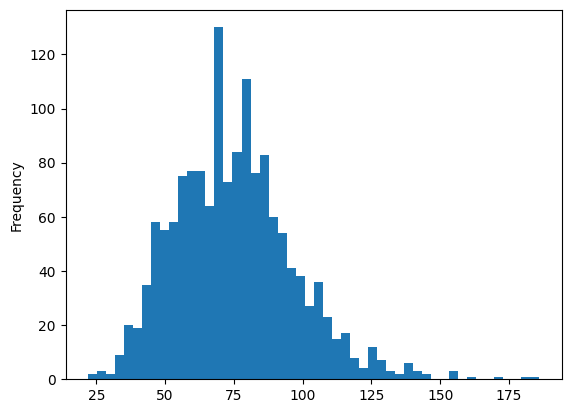

In [ ]:
df['headline'].apply(len).plot.hist(bins=50)

<Axes: ylabel='Frequency'>

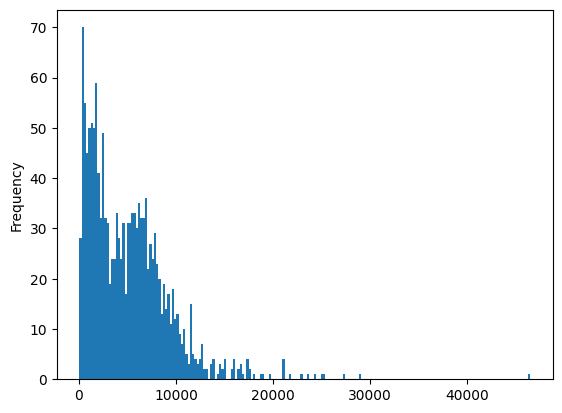

In [ ]:
df["text"].apply(len).plot.hist(bins=200)

### Findings
- Url not relevant, we can drop this column
- Technology is clearly underrepresented in the dataset (1/5 of the support of other categories)
- texts lengths are in the range 0-10_000 characters, very small minority goes up to 40_000 chars.

We will need to take those informations into account to train the best model possible.

In [4]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
nltk.download("stopwords")
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
X = df[['headline', 'text']]
y = df["category"]

X_train, y_train = X, y

## Stemming

In [13]:
stemmer = SnowballStemmer("french")

# Tokenization function with stemming
def tokenize_with_stemming(text):
    tokens = word_tokenize(text, language='french')  # Tokenization
    tokens = [stemmer.stem(token) for token in tokens]  # Stemming
    return tokens

french_stopwords = stopwords.words('french') + list(string.punctuation) + ["''", '``', '...', '’', '``', '«', '»', '``']

# in order for the stop words to be consistent with preprocessing
french_stopwords = [stemmer.stem(word) for word in french_stopwords]

vectorizer = TfidfVectorizer(tokenizer=tokenize_with_stemming,
                             stop_words=french_stopwords,
                             max_features=1000)

X = df[['headline', 'text']]
y = df["category"]

X_train_tfidf = vectorizer.fit_transform(X['headline'] + ' ' + X['text'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
desc_bow = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
desc_bow

,--,000,1,10,100,12,14,15,18,2,...,équip,établ,état,états-un,étranger,étud,étudi,éven,évit,être
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.150468,0.000000,0.000000,0.0,...,0.111423,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.126164,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.038176
3,0.0,0.000000,0.000000,0.043833,0.000000,0.0,0.000000,0.050314,0.000000,0.0,...,0.000000,0.055833,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.074896
4,0.0,0.061818,0.040686,0.000000,0.000000,0.0,0.000000,0.000000,0.045517,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.043572,0.020885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.080461,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.048693
1472,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1473,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.024424,0.000000,0.026796,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.014780
1474,0.0,0.000000,0.000000,0.021949,0.024118,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.041572,0.0,0.022996,0.139483,0.0,0.000000,0.037504


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

col_trans = ColumnTransformer(
    [('headline', vectorizer, 'headline'),
     ('text', vectorizer, 'text')],
)

pipe = make_pipeline(col_trans, RandomForestClassifier())

In [16]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('headline',
                                                  TfidfVectorizer(max_features=1000,
                                                                  stop_words=['au',
                                                                              'aux',
                                                                              'avec',
                                                                              'ce',
                                                                              'ce',
                                                                              'dan',
                                                                              'de',
                                                                              'de',
                                                                              'du',
                                                                              'elle',
                                                                              'en',
                                                                              'et',
                                                                              'eux',
                                                                              'il',
                                                                              'il',
                                                                              'je',
                                                                              'la',
                                                                              'le',
                                                                              'le',
                                                                              'leur',
                                                                              'lui',
                                                                              'ma',
                                                                              'mais',
                                                                              'me',
                                                                              'mêm',
                                                                              'me',
                                                                              'moi',
                                                                              'mon',
                                                                              'ne',
                                                                              'nos', ...],
                                                                  tokenizer=<function tokenize_with_stemming at 0x7f0b056...
                                                  'headline'),
                                                 ('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  stop_words=['au',
                                                                              'aux',
                                                                              'avec',
                                                                              'ce',
                                                                              'ce',
                                                                              'dan',
                                                                              'de',
                                                                              'de',
                                                                              'du',
                                                                              'elle',
                                                                              'en',
            

In [17]:
df_test = pd.read_csv('test.tsv', sep='\t')

# show count of each category
print(df_test['category'].value_counts())

X_test = df_test[['headline', 'text']]
y_test = df_test["category"]

category
business      100
health        100
politics      100
sports        100
technology     22
Name: count, dtype: int64


In [18]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    business       0.65      0.76      0.70       100
      health       0.85      0.91      0.88       100
    politics       0.80      0.81      0.81       100
      sports       0.94      0.90      0.92       100
  technology       1.00      0.05      0.09        22

    accuracy                           0.80       422
   macro avg       0.85      0.69      0.68       422
weighted avg       0.82      0.80      0.79       422



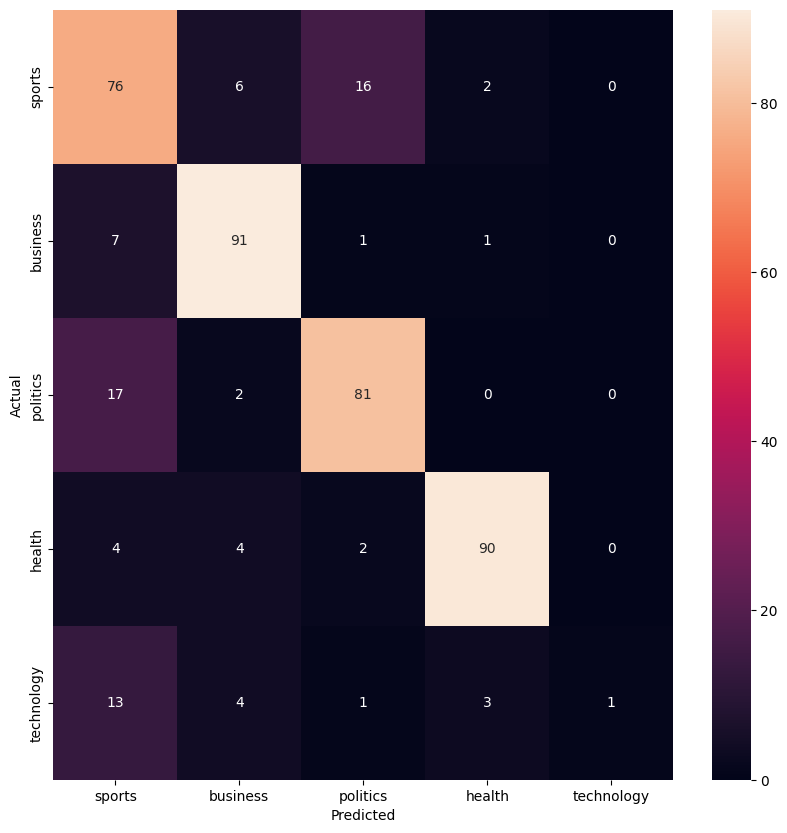

In [19]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['category'].unique(), yticklabels=df['category'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Let's see what type of model is better

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

models = [
    ('Baseline', DummyClassifier(strategy='most_frequent')),
    ('Multinomial NB', MultinomialNB()),
    ('CART', DecisionTreeClassifier()),
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Random forest', RandomForestClassifier())
]

for name, model in models:
    pipe = make_pipeline(col_trans, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f'{name}: {accuracy_score(y_test, y_pred)}')

# Cross validation for LR and Random Forest

In [22]:
from sklearn.model_selection import cross_val_score

def evaluate_model(name, model, X, y):
    pipe = make_pipeline(col_trans, model)
    scores = cross_val_score(pipe, X, y, cv=5)  # 5-fold cross-validation
    print(f'{name}: Mean Accuracy: {scores.mean()}')

evaluate_model("LR", LogisticRegression(), X_train, y_train)
evaluate_model("Random Forest", RandomForestClassifier(), X_train, y_train)


LR: Mean Accuracy: 0.8516170407695831
Random Forest: Mean Accuracy: 0.8163902885936783


## Lemmatization

In [ ]:
%%capture
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 43.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("fr_core_news_sm")

spacy_stopwords = nlp.Defaults.stop_words

In [ ]:
# Custom tokenizer function using spaCy for tokenization and lemmatization
def spacy_tokenizer(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text.lower() not in spacy_stopwords and token.is_alpha]
    return tokens

vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer,
                             max_features=1000)

X = df[['headline', 'text']]
y = df["category"]

X_train_tfidf = vectorizer.fit_transform(X['headline'] + ' ' + X['text'])

In [ ]:
desc_bow = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
desc_bow

,accepter,accord,accorder,accueillir,accusation,accuser,accès,acheter,actif,action,...,étendre,étranger,étude,étudiant,étudier,éviter,événement,être,île,œuvre
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.038418,0.0,0.000000
1,0.000000,0.225222,0.0,0.0,0.0,0.000000,0.05801,0.000000,0.000000,0.000000,...,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.061588,0.044793,0.0,0.067892
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.067834,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.040731,0.044539,0.000000,...,0.0,0.03714,0.0,0.000000,0.000000,0.038121,0.000000,0.030583,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.046868,0.051249,0.000000,...,0.0,0.00000,0.0,0.000000,0.000000,0.043865,0.000000,0.017596,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1472,0.000000,0.086029,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1473,0.000000,0.000000,0.0,0.0,0.0,0.070542,0.00000,0.000000,0.000000,0.035148,...,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.110504,0.0,0.000000
1474,0.032976,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.0,0.043463,0.140214,0.000000,0.000000,0.049042,0.0,0.000000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

col_trans = ColumnTransformer(
    [('headline', vectorizer, 'headline'),
     ('text', vectorizer, 'text')],
)

pipe = make_pipeline(col_trans, RandomForestClassifier())
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('headline',
                                                  TfidfVectorizer(max_features=1000,
                                                                  tokenizer=<function spacy_tokenizer at 0x7ec110717490>),
                                                  'headline'),
                                                 ('text',
                                                  TfidfVectorizer(max_features=1000,
                                                                  tokenizer=<function spacy_tokenizer at 0x7ec110717490>),
                                                  'text')])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
df_test = pd.read_csv('test.tsv', sep='\t')

# show count of each category
print(df_test['category'].value_counts())

X_test = df_test[['headline', 'text']]
y_test = df_test["category"]

category
business      100
health        100
politics      100
sports        100
technology     22
Name: count, dtype: int64


In [ ]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    business       0.71      0.77      0.74       100
      health       0.88      0.94      0.91       100
    politics       0.80      0.82      0.81       100
      sports       0.92      0.93      0.93       100
  technology       1.00      0.14      0.24        22

    accuracy                           0.83       422
   macro avg       0.86      0.72      0.72       422
weighted avg       0.84      0.83      0.81       422



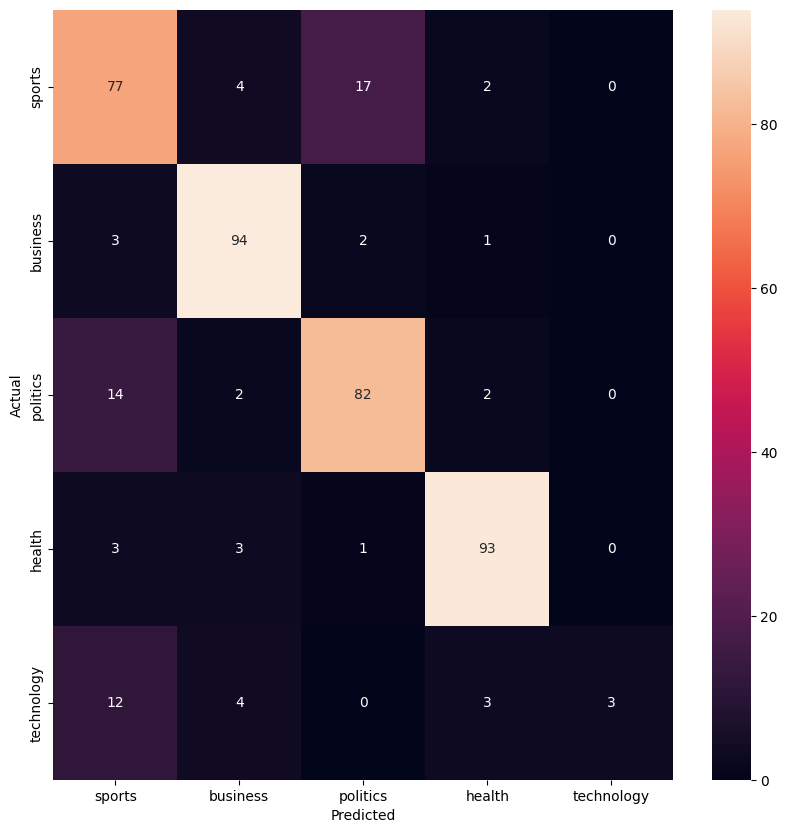

In [ ]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['category'].unique(), yticklabels=df['category'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

models = [
    ('Baseline', DummyClassifier(strategy='most_frequent')),
    ('Multinomial NB', MultinomialNB()),
    ('CART', DecisionTreeClassifier()),
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Random forest', RandomForestClassifier())
]

for name, model in models:
    pipe = make_pipeline(col_trans, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f'{name}: {accuracy_score(y_test, y_pred)}')

Baseline: 0.23696682464454977
Multinomial NB: 0.8388625592417062
CART: 0.6255924170616114
LR: 0.8696682464454977
KNN: 0.7227488151658767
Random forest: 0.8246445497630331


# Cross validation for LR and Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

def evaluate_model(name, model, X, y):
    pipe = make_pipeline(col_trans, model)
    scores = cross_val_score(pipe, X, y, cv=5)  # 5-fold cross-validation
    print(f'{name}: Mean Accuracy: {scores.mean()}')

evaluate_model("LR", LogisticRegression(), X_test, y_test)



LR: Mean Accuracy: 0.8222969187675071


In [ ]:
evaluate_model("LR", LogisticRegression(), X_train, y_train)

LR: Mean Accuracy: 0.86382501145213


In [ ]:
evaluate_model("Random Forest", RandomForestClassifier(), X_test, y_test)

Random Forest: Mean Accuracy: 0.7750420168067226


In [ ]:
evaluate_model("Random Forest", RandomForestClassifier(), X_train, y_train)

Random Forest: Mean Accuracy: 0.8340082455336691


## TO DO : Different tokens frequency threshold (Tf-Idf)


## TO DO : la validation croisée stratifiée (pour les ensembles de données déséquilibrés en termes de distribution de classes, la validation croisée stratifiée garantit que chaque sous-ensemble de données conserve la même distribution de classes que l'ensemble de données original.)


## TO DO : autres metriques pour comparer les modeles avec la CV (rapport)